# TASK - 7 SVM

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Step 2: Load Dataset and Clean
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Check for missing values
print("Missing values:", df.isnull().sum().sum())  # Should be 0

# Remove duplicates if any
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

# Feature matrix and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Missing values: 0
Removed 0 duplicate rows.


In [3]:
# Linear Kernel SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("\n🔹 SVM with Linear Kernel")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# RBF Kernel SVM (default)
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("🔹 SVM with RBF Kernel")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))



🔹 SVM with Linear Kernel
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

🔹 SVM with RBF Kernel
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [4]:
# Grid Search to tune C and gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("🔍 Best Parameters from GridSearchCV:")
print(grid.best_params_)

# Evaluate best model
y_pred_best = grid.predict(X_test)
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


🔍 Best Parameters from GridSearchCV:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



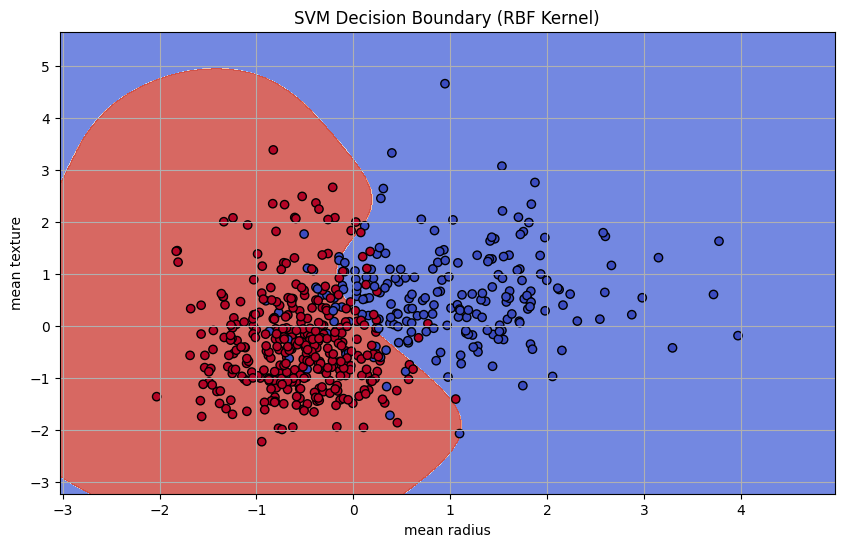

In [5]:
# Use only 2 features for visualization
features_2d = ['mean radius', 'mean texture']
X_2d = df[features_2d].values
y_2d = df['target'].values

# Standardize
X_2d_scaled = StandardScaler().fit_transform(X_2d)

# Train SVM on 2D
svm_2d = SVC(kernel='rbf', C=1, gamma='scale')
svm_2d.fit(X_2d_scaled, y_2d)

# Create meshgrid for plotting
h = 0.01
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y_2d, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(features_2d[0])
plt.ylabel(features_2d[1])
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.grid(True)
plt.show()
